<a href="https://colab.research.google.com/github/MohabASHRAF-byte/income-predication/blob/main/income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [516]:
from google.colab import files
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from scipy.stats import pointbiserialr, spearmanr
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats
import seaborn as sns
import time as timer
import xgboost as xgb
# this line to fix output without need to run cells again
%matplotlib inline

In [517]:
data = pd.read_csv("train_data.csv")
data_test = pd.read_csv("test_data.csv")

# **Data Exploring**

In [518]:
# remove white spaces in the columns name
for i in data.columns:
  data_test = data_test.rename(columns={i: i.strip()})
  data = data.rename(columns={i: i.strip()})
# remove all white spaces in values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data_test = data_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [519]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [520]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [521]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [522]:
data.tail(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [523]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [524]:
# ecoding
le  = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

for col in data_test.columns:
    if data_test[col].dtype == 'object':
        data_test[col] = le.fit_transform(data_test[col])

In [525]:
# null present
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(['?']).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

In [526]:
# nulls in dataset
col_names = data_test.columns
num_data = data_test.shape[0]
for c in col_names:
    num_non = data_test[c].isin(['?']).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

In [527]:
data['Income'].unique()

array([0, 1])

In [528]:
# correlation
param=[]
correlation=[]
abs_corr=[]

for c in data.columns:
    if c != 'Income' :
        if len(data[c].unique()) <= 2:
            corr = spearmanr(data['Income'],data[c])[0]
        else:
            corr = pointbiserialr(data['Income'],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)
param_df=param_df.set_index('parameter')
param_df

,correlation,abs_corr
parameter,,
education-num,0.335154,0.335154
relationship,-0.250918,0.250918
age,0.234037,0.234037
hours-per-week,0.229689,0.229689
capital-gain,0.223329,0.223329
sex,0.215980,0.215980
marital-status,-0.199307,0.199307
capital-loss,0.150526,0.150526
education,0.079317,0.079317


In [529]:
# count number of outliers in train data

category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'native-country', 'Income ','sex']
for col in data.columns:
    if col in category_col:
      continue;
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = ( ( data[col] < lower) | (data[col] > upper) )
    index_label = data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')


Number of outliers in age: 143
Number of outliers in fnlwgt: 992
Number of outliers in education-num: 1198
Number of outliers in capital-gain: 2712
Number of outliers in capital-loss: 1519
Number of outliers in hours-per-week: 9008
Number of outliers in Income: 7841


In [530]:
# count number of outliers in test data
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'native-country', 'Income ','sex']
for col in data_test.columns:
    if col in category_col:
      continue;
    q25, q75 = np.percentile(data_test[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = ( ( data_test[col] < lower) | (data_test[col] > upper) )
    index_label = data_test[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')


Number of outliers in age: 73
Number of outliers in fnlwgt: 485
Number of outliers in education-num: 596
Number of outliers in capital-gain: 1323
Number of outliers in capital-loss: 763
Number of outliers in hours-per-week: 4488
Number of outliers in Income: 3846


<Axes: xlabel='hours-per-week'>

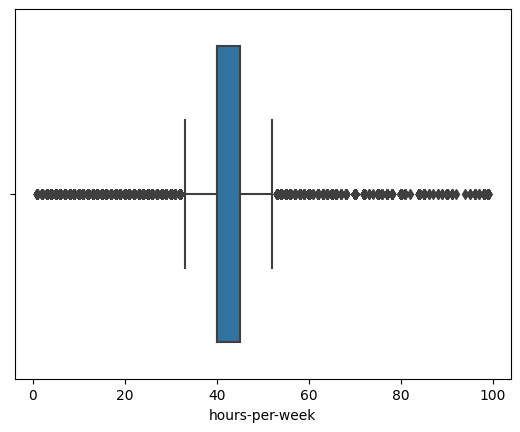

In [531]:
sns.boxplot(x=data['hours-per-week'])

<Axes: xlabel='age'>

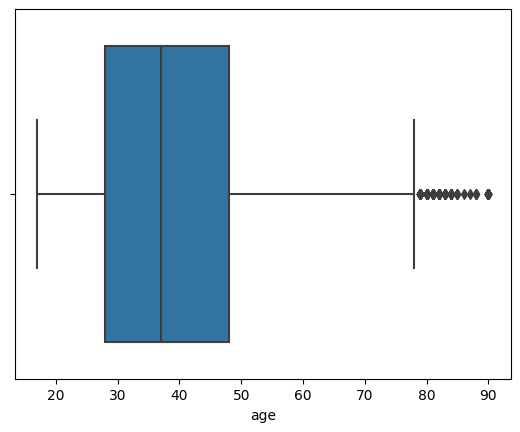

In [532]:
sns.boxplot(x=data['age'])

In [533]:
for col in data.columns :
  print(col , data[col].unique(), '\n')

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass [7 6 4 1 2 0 5 8 3] 

fnlwgt [ 77516  83311 215646 ...  34066  84661 257302] 

education [ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2] 

education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status [4 2 0 3 5 1 6] 

occupation [ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9] 

relationship [1 0 5 3 4 2] 

race [4 2 1 0 3] 

sex [1 0] 

capital-gain [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  29

In [534]:
print(data.isnull().sum()) ;
print(sum(data.duplicated()))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64
24


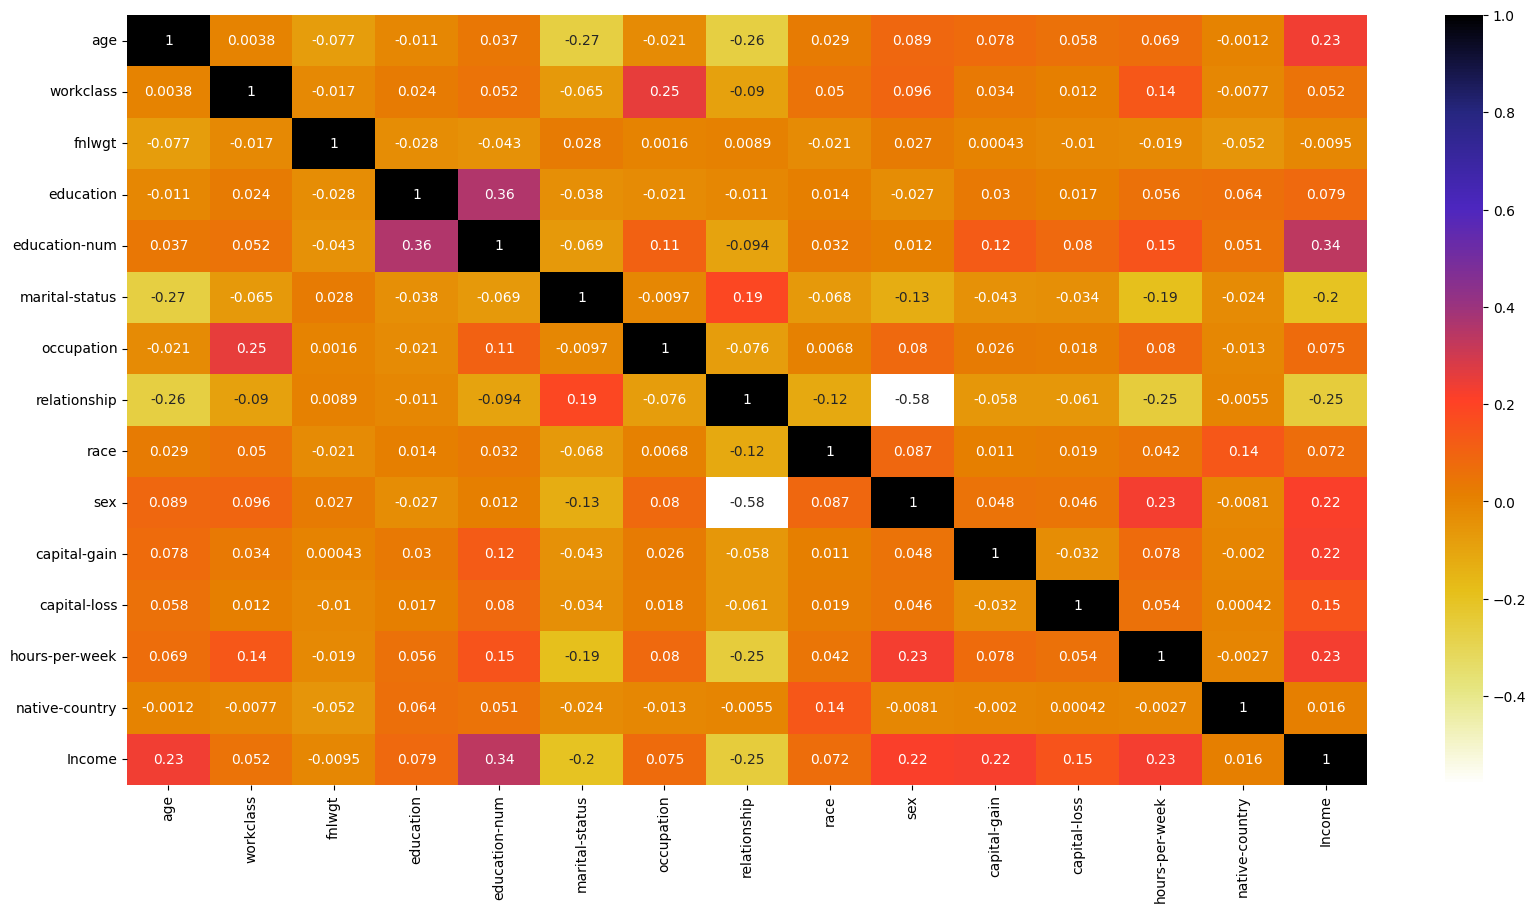

In [535]:
cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

# **Data Preprocessing**

In [536]:
data = data[data != '?'].dropna()
data = data.reset_index(drop=True)

data_test = data_test[data_test != '?'].dropna()
data_test = data_test.reset_index(drop=True)

In [537]:
# replace comman status with one equvilent in train data
data['marital-status'] = data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married')
data['marital-status'] = data['marital-status'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Not Married')
data['workclass'] = data['workclass'].replace(['State-gov', 'Local-gov', 'Federal-gov'], 'Gov')
data['workclass'] = data['workclass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], 'Non-Gov')
data['workclass'] = data['workclass'].replace(['Without-pay', 'Never-worked'], 'No salary')
data['relationship']=data['relationship'].replace(['Husband', 'Wife'], 'Spouse')

In [538]:
# replace comman status with one equvilent in test data

data_test['marital-status'] = data_test['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married')
data_test['marital-status'] = data_test['marital-status'].replace(['Divorced', 'Never-married','Separated','Widowed'], 'Not Married')
data_test['workclass'] = data_test['workclass'].replace(['State-gov', 'Local-gov', 'Federal-gov'], 'Gov')
data_test['workclass'] = data_test['workclass'].replace(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], 'Non-Gov')
data_test['workclass'] = data_test['workclass'].replace(['Without-pay', 'Never-worked'], 'No salary')
data_test['relationship']=data_test['relationship'].replace(['Husband', 'Wife'], 'Spouse')

In [539]:
data = data.drop_duplicates() ;
print(sum(data.duplicated()))

0


In [540]:
# scaler = MinMaxScaler()
# # normalization
# NormalizedData =["age","capital-gain","hours-per-week"]
# for i in NormalizedData:
#     data[i] = scaler.fit_transform(data[[i]])
#     data_test[i] = scaler.fit_transform(data_test[[i]])


In [541]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   workclass       32537 non-null  int64
 2   fnlwgt          32537 non-null  int64
 3   education       32537 non-null  int64
 4   education-num   32537 non-null  int64
 5   marital-status  32537 non-null  int64
 6   occupation      32537 non-null  int64
 7   relationship    32537 non-null  int64
 8   race            32537 non-null  int64
 9   sex             32537 non-null  int64
 10  capital-gain    32537 non-null  int64
 11  capital-loss    32537 non-null  int64
 12  hours-per-week  32537 non-null  int64
 13  native-country  32537 non-null  int64
 14  Income          32537 non-null  int64
dtypes: int64(15)
memory usage: 4.0 MB


In [542]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.868734,1.897808e+05,10.297507,10.081815,2.611427,6.572856,1.446538,3.665827,0.669238,1078.443741,87.368227,40.440329,36.721579,0.240926
std,13.637984,1.456445,1.055565e+05,3.870142,2.571633,1.506301,4.229521,1.607064,0.848847,0.470495,7387.957424,403.101833,12.346889,7.820732,0.427652
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369930e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [543]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(['?']).sum()
    print(num_non)
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


# **Data Sampling**

In [544]:
features =['marital-status','education-num','age','hours-per-week','relationship','capital-gain']
dropedItems =["education","fnlwgt","workclass","native-country","race","occupation","capital-loss"]

# ,'relationship','capital-gain'
X_train=data[features]
Y_train=data['Income']
X_test=data_test[features]
Y_test=data_test['Income']



## **Data Sampling**

In [545]:
# # overfiting
# ros = RandomOverSampler(random_state=0)

# X_train, Y_train = ros.fit_resample(X_train, Y_train)

# print("Number of samples in each class:", np.bincount(Y_train))

In [546]:
# # smote
# X_train.info()
# smote=SMOTE()
# X_train,Y_train = smote.fit_resample(X_train,Y_train)
# X_test,Y_test = smote.fit_resample(X_test,Y_test)

# **Test Algorithms**

### **logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


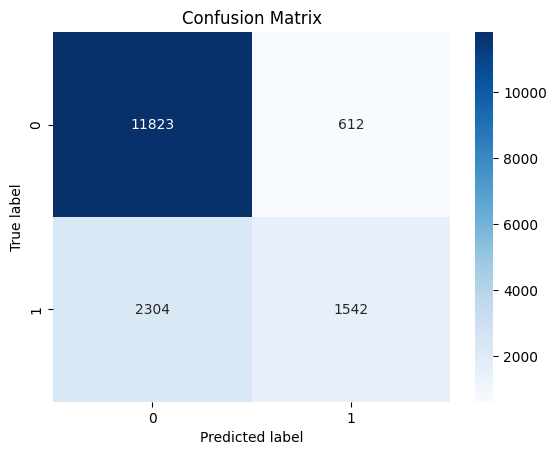

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.72      0.40      0.51      3846

    accuracy                           0.82     16281
   macro avg       0.78      0.68      0.70     16281
weighted avg       0.81      0.82      0.80     16281



In [547]:

classifier = LogisticRegression(random_state =150)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
x=classifier.score(X_train,Y_train)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix')

plt.show()
cr=classification_report(Y_test, y_pred)
print(cr)

### **XGB Boost**

Accuracy: 0.8546158098396904



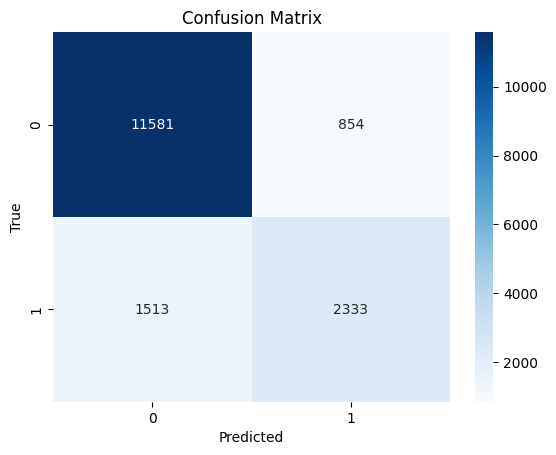

In [548]:
model = xgb.XGBClassifier(random_state=544)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == Y_test) / len(Y_test)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Decision Tree Classifier**

Accuracy: 0.823045267489712



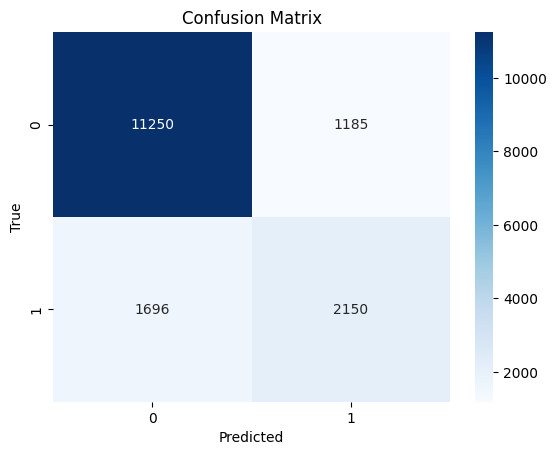

In [549]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy) 
print()
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **SVM**

Accuracy: 0.7990295436398256



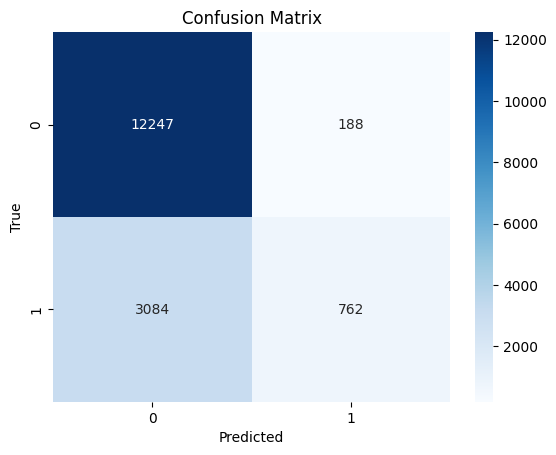

In [550]:
clf = svm.SVC(kernel='poly', degree=1)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print()
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Random ForestClassifier**

Accuracy: 0.8361280019654812



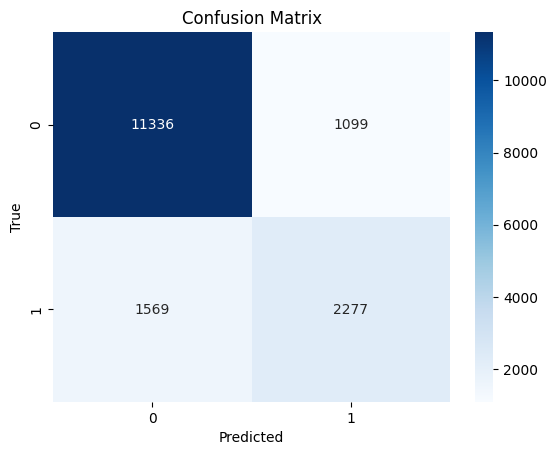

In [551]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy) 
print()
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()